# Data Exploration

In this notebook, we will explore the datasets provided for the project. We will load the data, check for missing values, and understand the structure of the files.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## List Data Files

In [23]:
data_dir = '../data'
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/reviews.csv
../data/test.csv
../data/calendar.csv
../data/train.csv
../data/sample_submission.csv


## Load Datasets

In [24]:
try:
    train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
    test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))
    reviews_df = pd.read_csv(os.path.join(data_dir, 'reviews.csv'))
    calendar_df = pd.read_csv(os.path.join(data_dir, 'calendar.csv'))
    sample_submission_df = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")

All datasets loaded successfully.


## Explore Train Data

In [25]:
print("Train Data Shape:", train_df.shape)
display(train_df.head())

Train Data Shape: (24153, 58)


,Unnamed: 0.1,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,0,25436,https://www.airbnb.com/rooms/25436,20250627144659,2025-06-28,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"İstanbul, Turkey","Merhabalar . Kuş sesi , akan su sesi ile uyan...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/067a8...,https://a0.muscache.com/im/pictures/user/067a8...,Beşiktaş,1.0,1.0,"['email', 'phone']",t,t,"Beşiktaş/ bebek, İstanbul, Turkey",Besiktas,NaN,41.078830,29.038630,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,NaN,"[""Room-darkening shades"", ""Wine glasses"", ""Sel...",NaN,100,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
1,1,1,34177,https://www.airbnb.com/rooms/34177,20250627144659,2025-07-01,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,https://www.airbnb.com/users/show/147330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Beşiktaş, İstanbul, Turkey",Besiktas,NaN,41.066810,29.040350,Entire home,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Free dryer \u2013 In unit"", ""Extra pillows a...","1,794.00",100,365,4.69,4.69,4.88,4.88,4.81,4.69,4.81,NaN,f,5,5,0,0
2,2,2,42835,https://www.airbnb.com/rooms/42835,20250627144659,2025-06-28,previous scrape,Cozy apartment in the heart of Istanbul,Welcome to our cozy 2-bedroom apartment locate...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,187026,https://www.airbnb.com/users/show/187026,Attila,2010-07-31,"Istanbul, Turkey",I am from Istanbul/ Turkey. I will do my best ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/187026/profil...,https://a0.muscache.com/im/users/187026/profil...,Şişli,3.0,3.0,"['email', 'phone']",t,t,NaN,Sisli,NaN,41.043030,28.985310,Entire rental unit,Entire home/apt,4,NaN,2 baths,1.0,NaN,"[""Wine glasses"", ""Laundromat nearby"", ""Cleanin...",NaN,100,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,1,2,0
3,3,3,73477,https://www.airbnb.com/rooms/73477,20250627144659,2025-07-01,city scrape,Sea View Apartment in Taksim/ Center of Istanbul,Sea View Apartment in Taksim/ Center of Istanbul,Gumussuyu,https://a0.muscache.com/pictures/409813ff-21c0...,383789,https://www.airbnb.com/users/show/383789,Berat,2011-02-09,"İstanbul, Turkey",Im a young professional who lives both in Ista...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Taksim,2.0,2.0,"['email', 'phone']",t,t,"Beyoğlu, İstanbul, Turkey",Beyoglu,NaN,41.034447,28.987555,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Window AC unit"", ""Extra pillows and blankets...","2,331.00",100,360,5.00,5.00,4.82,5.00,5.00,5.00,4.91,NaN,f,2,2,0,0
4,4,4,77292,https://www.airbnb.com/rooms/77292,20250627144659,2025-06-30,previous scrape,3 Bedroom Apartmen

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  24153 non-null  int64  
 1   Unnamed: 0                                    24153 non-null  int64  
 2   id                                            24153 non-null  int64  
 3   listing_url                                   24153 non-null  object 
 4   scrape_id                                     24153 non-null  int64  
 5   last_scraped                                  24153 non-null  object 
 6   source                                        24153 non-null  object 
 7   name                                          24153 non-null  object 
 8   description                                   23501 non-null  object 
 9   neighborhood_overview                         6905 non-null  

In [27]:
train_df.describe()

,Unnamed: 0.1,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,24153.000000,24153.000000,2.415300e+04,2.415300e+04,2.415300e+04,23485.000000,23485.000000,0.0,24153.000000,24153.000000,24153.000000,20839.000000,23639.000000,20871.000000,24153.000000,24153.000000,15052.000000,15050.000000,15052.000000,15050.000000,15052.000000,15050.000000,15049.000000,24153.000000,24153.000000,24153.000000,24153.000000
mean,12076.000000,14850.732621,8.485073e+17,2.025063e+13,3.512887e+08,26.026570,29.657654,NaN,41.029320,28.972679,3.538981,1.212630,1.521384,2.095875,58.221380,470.528878,4.582673,4.615631,4.536973,4.720405,4.740084,4.644599,4.541681,23.771830,21.446156,2.179522,0.033039
std,6972.514862,8554.309302,4.721010e+17,4.578220e+00,2.045644e+08,82.050365,100.810116,NaN,0.048364,0.154331,2.177697,0.901427,1.643558,2.204290,61.847969,310.405535,0.691445,0.666244,0.708628,0.612142,0.597183,0.595877,0.684091,79.558098,79.817644,5.484710,0.300686
min,0.000000,0.000000,2.543600e+04,2.025063e+13,1.058230e+05,1.000000,1.000000,NaN,40.815460,28.007570,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6038.000000,7445.000000,6.634897e+17,2.025063e+13,1.659560e+08,2.000000,2.000000,NaN,41.005032,28.965280,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,4.510000,4.570000,4.470000,4.750000,4.770000,4.570000,4.500000,1.000000,1.000000,0.000000,0.000000
50%,12076.000000,14932.000000,9.490009e+17,2.025063e+13,4.110136e+08,5.000000,7.000000,NaN,41.031507,28.980280,3.000000,1.000000,1.000000,2.000000,100.000000,365.000000,4.800000,4.830000,4.760000,4.920000,4.940000,4.830000,4.740000,5.000000,2.000000,0.000000,0.000000
75%,18114.000000,22277.000000,1.233129e+18,2.025063e+13,5.085327e+08,14.000000,17.000000,NaN,41.048843,29.004379,4.000000,1.000000,2.000000,3.000000,100.000000,365.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,13.000000,10.000000,2.000000,0.000000
max,24152.000000,29636.000000,1.452164e+18,2.025063e+13,7.034169e+08,750.000000,5373.000000,NaN,41.486680,29.870790,16.000000,50.000000,50.000000,54.000000,999.000000,9999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,530.000000,530.000000,60.000000,8.000000


In [28]:
print("Missing Values in Train Data:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Missing Values in Train Data:
description                       652
neighborhood_overview           17248
host_name                         660
host_since                        668
host_location                    8794
host_about                      14797
host_response_time               8186
host_response_rate               8186
host_acceptance_rate             7207
host_is_superhost                 480
host_thumbnail_url                668
host_picture_url                  668
host_neighbourhood              21544
host_listings_count               668
host_total_listings_count         668
host_verifications                668
host_has_profile_pic              668
host_identity_verified            668
neighbourhood                   17248
neighbourhood_group_cleansed    24153
bathrooms                        3314
bathrooms_text                    104
bedrooms                          514
beds                             3282
price                            3349
review_scores_rating

## Explore Test Data

In [29]:
print("Test Data Shape:", test_df.shape)
display(test_df.head())

Test Data Shape: (4750, 56)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,536526,https://www.airbnb.com/rooms/536526,20250627144659,2025-07-01,city scrape,"A Lovely, Modern, 1bd Apt in Center",This is the top floor flat of my historical bu...,"It is a very central place, walking distance t...",https://a0.muscache.com/pictures/18523966/0e7c...,2248444,https://www.airbnb.com/users/show/2248444,Pinar,2012-04-29,"Bonn, Germany",I am an urban planner and bought a historical ...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/2248444/profi...,https://a0.muscache.com/im/users/2248444/profi...,Taksim,4.0,9.0,"['email', 'phone']",t,t,"İstanbul, Istanbul, Turkey",Beyoglu,NaN,41.03806,28.97582,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Window AC unit"", ""Extra pillows and blankets...",2,1095,4.62,4.72,4.73,4.78,4.88,4.13,4.40,34-1331,t,4,3,1,0
1,1,124137,https://www.airbnb.com/rooms/124137,20250627144659,2025-07-01,city scrape,Beautiful Artist's home staycation,"Welcome to your home in Istanbul, an artistica...",The apartment is at the heart of Istanbul's vi...,https://a0.muscache.com/pictures/miso/Hosting-...,594053,https://www.airbnb.com/users/show/594053,Devrim,2011-05-16,"İstanbul, Turkey",I was born and raised in Istanbul. After compl...,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/e03cb...,https://a0.muscache.com/im/pictures/user/e03cb...,Taksim,1.0,3.0,"['email', 'phone']",t,t,"İstanbul, Istanbul, Turkey",Beyoglu,NaN,41.03451,28.98654,Entire rental unit,Entire home/apt,6,1.0,1 bath,3.0,4.0,"[""Window AC unit"", ""Extra pillows and blankets...",100,365,4.85,4.91,4.91,4.84,4.91,4.83,4.80,NaN,t,1,1,0,0
2,2,164216,https://www.airbnb.com/rooms/164216,20250627144659,2025-07-01,city scrape,Ottoman Flat 2BR @Taksim Square,NaN,The Taksim district is certainly alive. The de...,https://a0.muscache.com/pictures/14430623/3b7c...,783470,https://www.airbnb.com/users/show/783470,Aslinaz,2011-07-06,"Istanbul, Turkey",After a pretty long HR career I moved in Londo...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/783470/profil...,https://a0.muscache.com/im/users/783470/profil...,Taksim,3.0,4.0,"['email', 'phone']",t,t,"Taksim, Istanbul, Turkey",Beyoglu,NaN,41.03757,28.98327,Entire rental unit,Entire home/apt,6,1.0,1 bath,2.0,5.0,"[""Elevator"", ""Hair dryer"", ""Luggage dropoff al...",100,365,4.30,4.28,4.31,4.72,4.78,4.50,4.19,NaN,f,3,3,0,0
3,3,541629,https://www.airbnb.com/rooms/541629,20250627144659,2025-06-28,city scrape,Apartment flat entrance - Beyoglu,NaN,NaN,https://a0.muscache.com/pictures/7551372/81550...,2464199,https://www.airbnb.com/users/show/2464199,Fahrettin,2012-05-25,"Istanbul, Turkey",Istanbul is a beautiful city; the district Bey...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/2464199/profi...,https://a0.muscache.com/im/users/2464199/profi...,Karaköy,5.0,6.0,"['email', 'phone']",t,t,NaN,Beyoglu,NaN,41.03025,28.97029,Entire rental unit,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Room-darkening shades"", ""Window guards"", ""Ha...",100,1125,4.00,3.88,3.71,4.35,4.35,4.18,4.00,NaN,f,5,

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4750 non-null   int64  
 1   id                                            4750 non-null   int64  
 2   listing_url                                   4750 non-null   object 
 3   scrape_id                                     4750 non-null   int64  
 4   last_scraped                                  4750 non-null   object 
 5   source                                        4750 non-null   object 
 6   name                                          4750 non-null   object 
 7   description                                   4620 non-null   object 
 8   neighborhood_overview                         1240 non-null   object 
 9   picture_url                                   4750 non-null   o

In [31]:
print("Missing Values in Test Data:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing Values in Test Data:
description                      130
neighborhood_overview           3510
host_name                        109
host_since                       109
host_location                   1795
host_about                      3068
host_response_time              1538
host_response_rate              1538
host_acceptance_rate            1367
host_is_superhost                 81
host_thumbnail_url               109
host_picture_url                 109
host_neighbourhood              4356
host_listings_count              109
host_total_listings_count        109
host_verifications               109
host_has_profile_pic             109
host_identity_verified           109
neighbourhood                   3510
neighbourhood_group_cleansed    4750
bathrooms                         19
bathrooms_text                    19
bedrooms                          22
beds                              14
review_scores_rating            1874
review_scores_accuracy          1874
review_sc

## Explore Reviews Data

In [32]:
print("Reviews Data Shape:", reviews_df.shape)
display(reviews_df.head())

Reviews Data Shape: (516034, 2)


,listing_id,date
0,34177,2015-12-29
1,34177,2016-01-19
2,34177,2016-02-19
3,34177,2016-02-27
4,34177,2016-05-03


In [33]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516034 entries, 0 to 516033
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  516034 non-null  int64 
 1   date        516034 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.9+ MB


## Explore Calendar Data

In [34]:
print("Calendar Data Shape:", calendar_df.shape)
display(calendar_df.head())

Calendar Data Shape: (10817505, 5)


,listing_id,date,available,minimum_nights,maximum_nights
0,25436,2025-06-28,f,100,160
1,25436,2025-06-29,f,100,160
2,25436,2025-06-30,f,100,160
3,25436,2025-07-01,f,100,160
4,25436,2025-07-02,f,100,160


In [35]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817505 entries, 0 to 10817504
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   minimum_nights  int64 
 4   maximum_nights  int64 
dtypes: int64(3), object(2)
memory usage: 412.7+ MB


## Explore Sample Submission

In [36]:
print("Sample Submission Shape:", sample_submission_df.shape)
display(sample_submission_df.head())

Sample Submission Shape: (4750, 2)


,ID,TARGET
0,536526,NaN
1,124137,NaN
2,164216,NaN
3,541629,NaN
4,572504,NaN


## Data Cleaning & Further Exploration

In [37]:
# Clean 'price' column in Train Data
if 'price' in train_df.columns:
    # Remove '$' and ',' and convert to float
    train_df['price'] = train_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    print("Price column cleaned and converted to float.")
    
    # Display basic statistics for Price
    print(train_df['price'].describe())

Price column cleaned and converted to float.
count    2.080400e+04
mean     4.523767e+03
std      4.016376e+04
min      8.000000e+01
25%      1.580750e+03
50%      2.493000e+03
75%      3.956000e+03
max      4.250147e+06
Name: price, dtype: float64


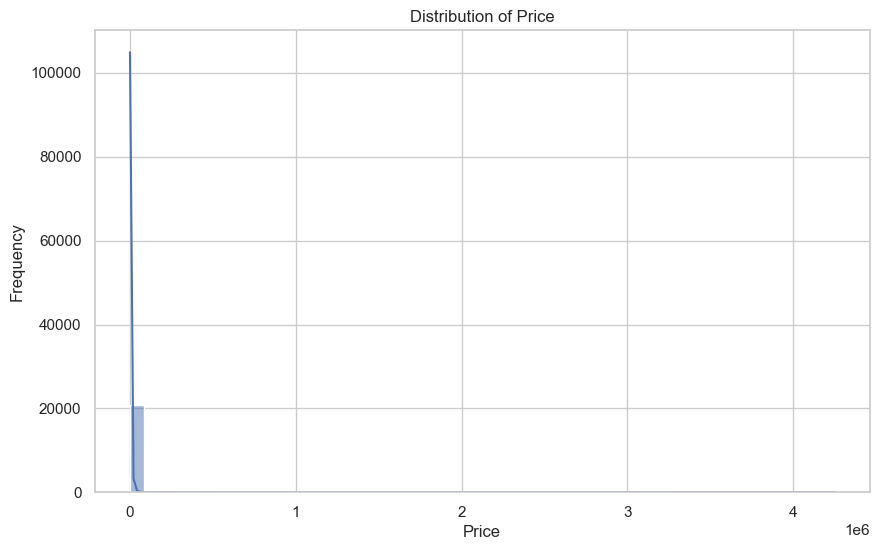

In [38]:
# Visualize Price Distribution
# Since the price distribution is highly skewed with extreme outliers (max ~4M vs median ~2.5k),
# we will visualize it in two ways:
# 1. Capping outliers (e.g., showing only up to the 99th percentile)
# 2. Using a log scale

plt.figure(figsize=(15, 6))

# Plot 1: Price Distribution (99th Percentile)
plt.subplot(1, 2, 1)
upper_limit = train_df['price'].quantile(0.99)
sns.histplot(train_df[train_df['price'] < upper_limit]['price'], bins=50, kde=True)
plt.title(f'Distribution of Price (Below {upper_limit:.0f})')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot 2: Log-Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(train_df['price']), bins=50, kde=True)
plt.title('Log-Distribution of Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [39]:
# Check Date Ranges in Calendar and Reviews
print("Calendar Date Range:", calendar_df['date'].min(), "to", calendar_df['date'].max())
print("Reviews Date Range:", reviews_df['date'].min(), "to", reviews_df['date'].max())

Calendar Date Range: 2025-06-27 to 2026-07-01
Reviews Date Range: 2011-05-17 to 2025-07-02


In [40]:
# Check for overlapping IDs between Train and Test
train_ids = set(train_df['id'])
test_ids = set(test_df['id'])
overlap = train_ids.intersection(test_ids)
print(f"Number of overlapping IDs between Train and Test: {len(overlap)}")

Number of overlapping IDs between Train and Test: 0
